In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction
Covid-19 as we know is deadly virus, and it affects our lungs. The idea behind this project is to classify whether or not patient have covid based on x-ray image passed.

### Importing Libraries
Let's begin with 0. Let's import all neccessary libraies

In [4]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
import matplotlib.pyplot as plt

### Reading Data
Let's import csv files which have name of files and labels.

In [5]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_image_data/Training_set_covid.csv")
train_data

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0
...,...,...
3474,Image_3475.jpg,0
3475,Image_3476.jpg,0
3476,Image_3477.jpg,0
3477,Image_3478.jpg,1


### Adding filepath
Our dataset dont have path to image files. So here, we are adding 1 column filepath where we concat file name with path to directory where image is store.

In [7]:
train_data["filepath"]="/content/drive/MyDrive/Colab Notebooks/covid_image_data/train/"+train_data["filename"]
train_data

,filename,label,filepath
0,Image_1.jpg,1,/content/drive/MyDrive/Colab Notebooks/covid_i...
1,Image_2.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
2,Image_3.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
3,Image_4.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
4,Image_5.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
...,...,...,...
3474,Image_3475.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
3475,Image_3476.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
3476,Image_3477.jpg,0,/content/drive/MyDrive/Colab Notebooks/covid_i...
3477,Image_3478.jpg,1,/content/drive/MyDrive/Colab Notebooks/covid_i...


 ### Data Augmentation
 Since we have very less data, I am augmenting my data and also creating a variable where training and validation image will be stored

In [10]:
train_datagen=ImageDataGenerator(validation_split=0.2,zoom_range=0.2,rescale=1./255.,horizontal_flip=True)

In [11]:
train_data["label"]=train_data["label"].astype(str)

In [23]:
train_images=train_datagen.flow_from_dataframe(train_data,x_col="filepath",batch_size=8,target_size=(255,255),class_mode="binary",shuffle=True,subset='training',y_col="label")
valid_images=train_datagen.flow_from_dataframe(train_data,x_col="filepath",batch_size=8,target_size=(255,255),class_mode="binary",shuffle=True,subset='validation',y_col="label")

Found 2784 validated image filenames belonging to 2 classes.
Found 695 validated image filenames belonging to 2 classes.


### Importing ResNet50
Let's import ResNet50 and initialize our base_model.

In [25]:
base_model = ResNet50(input_shape=(225, 225,3), include_top=False, weights="imagenet")

Making all layers Non-Trainable so that we wont affect it's actual weight and just train last layers and add number of classes we want to train in output layer.

In [26]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [28]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [29]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [30]:
resnet_history = base_model.fit(train_images, validation_data = valid_images, steps_per_epoch =int(train_images.n/8), epochs = 20)

Epoch 1/20
348/348 [==============================] - 162s 453ms/step - loss: 0.7703 - acc: 0.8588 - val_loss: 1.2608 - val_acc: 0.8791
Epoch 2/20
348/348 [==============================] - 84s 242ms/step - loss: 0.3550 - acc: 0.9198 - val_loss: 2.8488 - val_acc: 0.4518
Epoch 3/20
348/348 [==============================] - 84s 241ms/step - loss: 0.3501 - acc: 0.9229 - val_loss: 1.0196 - val_acc: 0.7007
Epoch 4/20
348/348 [==============================] - 84s 241ms/step - loss: 0.3151 - acc: 0.9207 - val_loss: 0.5498 - val_acc: 0.8633
Epoch 5/20
348/348 [==============================] - 85s 245ms/step - loss: 0.2376 - acc: 0.9281 - val_loss: 0.4247 - val_acc: 0.9094
Epoch 6/20
348/348 [==============================] - 86s 246ms/step - loss: 0.2273 - acc: 0.9248 - val_loss: 0.3911 - val_acc: 0.8978
Epoch 7/20
348/348 [==============================] - 86s 248ms/step - loss: 0.2166 - acc: 0.9319 - val_loss: 0.2936 - val_acc: 0.9295
Epoch 8/20
348/348 [==============================] - 

### Conclusion
Our Model is trained optimally. Below is graphical representation of its training and validation accuracy and loss

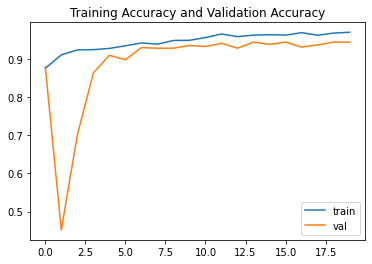

In [32]:
plt.plot(resnet_history.history["acc"],label="train")
plt.plot(resnet_history.history["val_acc"],label="val")
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()

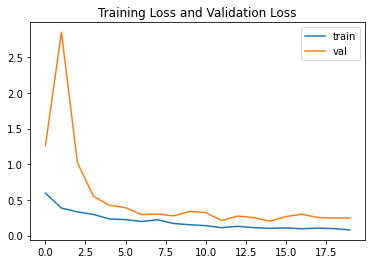

In [33]:
plt.plot(resnet_history.history["loss"],label="train")
plt.plot(resnet_history.history["val_loss"],label="val")
plt.title("Training Loss and Validation Loss")
plt.legend()